In [1]:
import os

os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [2]:
import jax

jax.config.update("jax_platform_name", "cpu")

In [3]:
import numpy as np
import ruptures as rpt
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from deepcpd import (
    get_optimal_state_sequence,
    get_optimal_state_sequence_batch,
    get_loss_torch,
    get_loss_jax,
)
import torch

/home/truong/mambaforge/envs/data/lib/python3.9/site-packages/scipy/cluster/vq.py:603: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


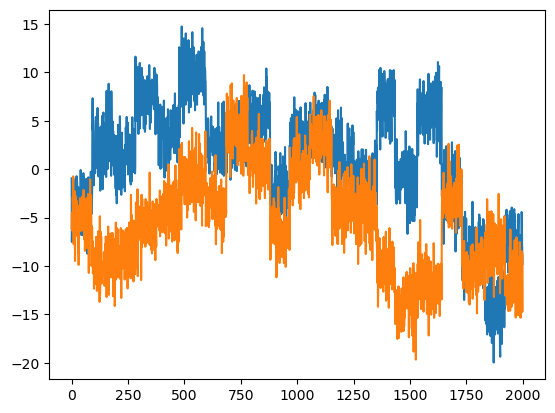

In [4]:
signal, bkps = rpt.pw_constant(2000, n_bkps=20, n_features=2, noise_std=2)
_ = plt.plot(signal)

centroids, labels = kmeans2(signal, 50)

# JAX

The loss is equal to 2108.80


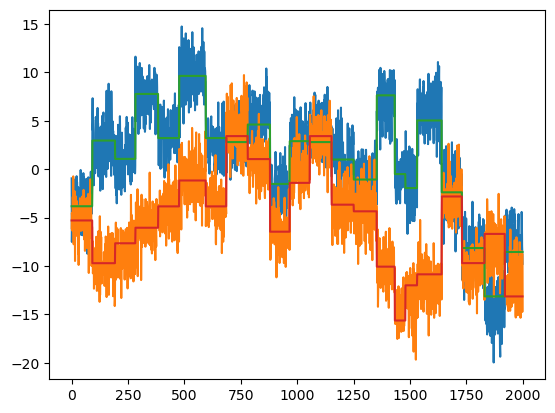

In [9]:
signal_jax = jnp.array(signal)
centroids_jax = jnp.array(centroids)

# get the optimal state sequence
optimal_state_sequence = get_optimal_state_sequence(signal, centroids, penalty=100)
# compute the approximation
approximation = centroids[optimal_state_sequence]
# plot the 2 signals
plt.plot(signal_jax)
plt.plot(approximation)


print(f"The loss is equal to {get_loss_jax(signal, centroids_jax, penalty=100):.2f}")

# TORCH

In [6]:
signal_torch = torch.from_numpy(signal)
batch = signal_torch[None, ...]
centroids_torch = torch.from_numpy(centroids)

In [10]:
print(f"The loss is equal to {get_loss_torch(batch, centroids_torch, penalty=100):.2f}")

The loss is equal to 2108.80
